# Introduction

Hello! We are Team Wealth. We are trying to find the wealthiest neighborhood in Pittsburgh. We agreed upon this idea by using 4 different metrics. These metrics are Housing Price, Tax Delinquency, Population Density, and Sales Transactions.

# Metric 

Team Name: Team Wealth

Evan Mains ewm@pitt.edu https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/d5573eb6-a647-42b4-8b17-6e4787e48eeb/download/population- 
This dataset is used to find the most densly populated neighborhood in Pittsburgh.

Ashish Subedi ass152@pitt.edu https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/13982f58-e618-400c-8f69-6a3
This dataset is used to find housing prices for sale in Pittsburgh neighborhoods.

Jason Gao Jason.gao@pitt.edu https://data.wprdc.org/dataset/real-estate-sales 
This dataset is used to find real estate sales in Pittsburgh neighborhoods.

Jacob Qaplan jck128@pitt.edu https://data.wprdc.org/dataset/city-of-pittsburgh-property-tax-delinquency 
This dataset is used to find property tax delinquency gh neighborhoods.

These datasets all combine to find the wealthiest neighborhood in Pittsburgh.

# Jason Gao's Project:

In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import matplotlib.colors as mcolors



#Get the geojson_file
geojson_fileName="pittsburgh_neighborhoods.geojson"
geojson_filepath=os.path.abspath(geojson_fileName)

#Error Checking to make sure there is a file there
if not os.path.exists(geojson_filepath):
    raise FileNotFoundError(f"GeoJSON file not found: {geojson_filepath}")

# Load the GeoJSON
gdf = gpd.read_file(geojson_filepath)
print("GeoJSON loaded successfully!")


#Options:
#Show the neighborhood names on the map
show_labels=True


##Base MAP

ax = gdf.plot(figsize=(12, 12), color='lightgray', edgecolor='black')

name_col = "hood"


if show_labels:
    for idx, row in gdf.iterrows():
        point = row.geometry.representative_point()
        label = str(row[name_col])
        plt.text(point.x, point.y, label, fontsize=7, ha='center', color='blue')

plt.title("Pittsburgh Neighborhoods Overlay")
plt.axis('off')
plt.tight_layout()
plt.show()



FileNotFoundError: GeoJSON file not found: c:\Users\jag409\Documents\GitHub\Big-Ideas-Group-Project\pittsburgh_neighborhoods.geojson

**Lets grab our data**


In [1]:
Sales_data=os.path.join(os.getcwd(),'Jag409_Sales_Transaction.csv')

# Try to load the data
try:
    # Load the CSV file
    df = pd.read_csv(Sales_data)
    print(f"File  loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{Sales_data}' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

NameError: name 'os' is not defined

In [6]:
grouped=df.groupby('neighborhood').size()
print(grouped)

neighborhood
Allegheny Center        3
Allegheny West          3
Allentown              17
Arlington              11
Banksville             10
                       ..
Upper Lawrenceville    22
West End                4
West Oakland           10
Westwood               17
Windgap                 7
Length: 86, dtype: int64


## Chart all of the neighborhoods


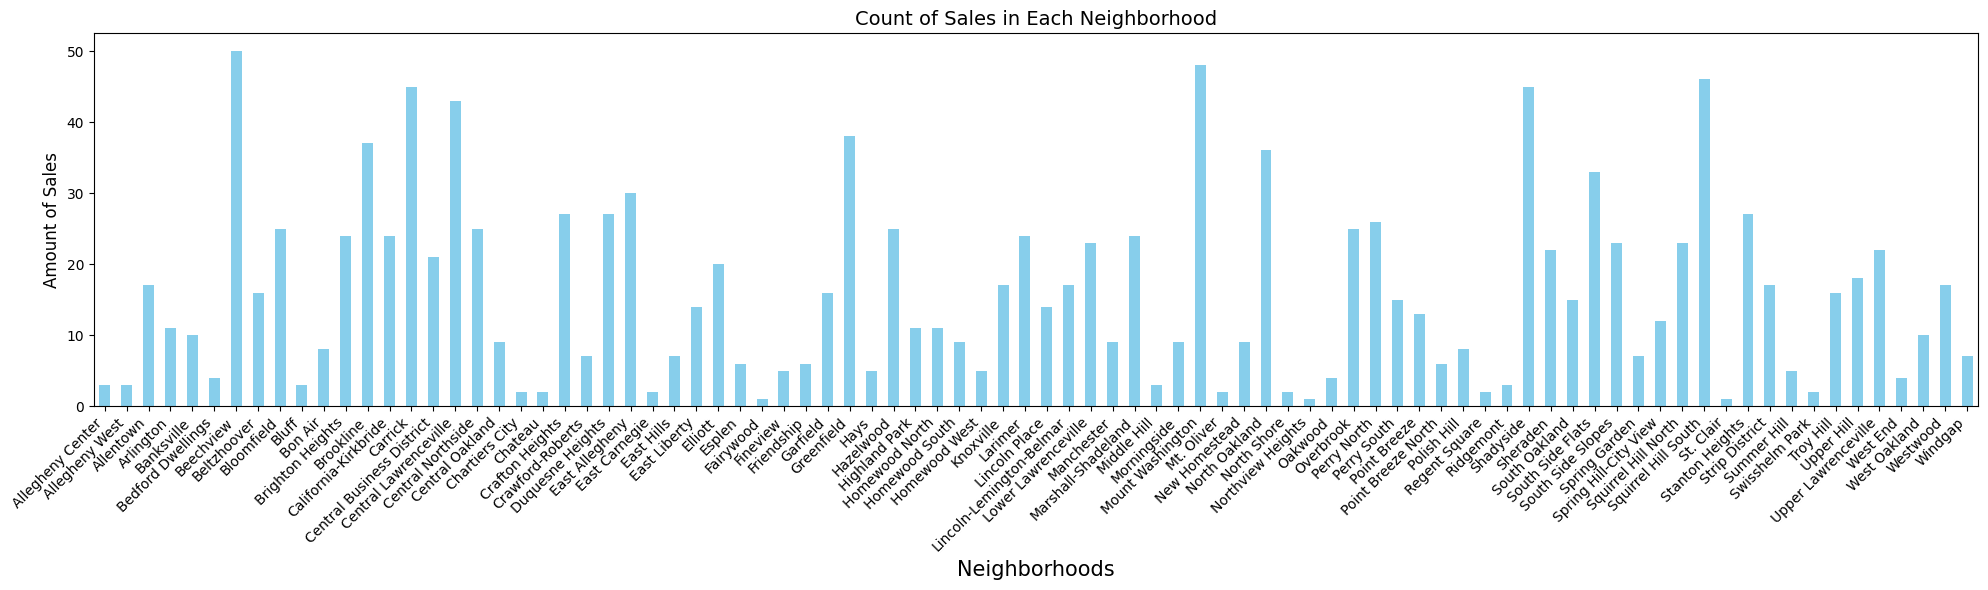

In [25]:
#Make it a graph :)
neighboor_count_sales=grouped

plt.figure(figsize=(20,6))
neighboor_count_sales.plot(kind='bar',color='skyblue')



#This is the labels for the chart

plt.title('Count of Sales in Each Neighborhood',fontsize=14)
plt.xlabel('Neighborhoods',fontsize=15)
plt.ylabel('Amount of Sales',fontsize=12)

plt.xticks(rotation=45,ha='right')


plt.tight_layout()
plt.show()




**Lets get top 10 neighborhoods and get the average of the sale and the cost**

In [35]:
#Lets do the top 5 nieghborhoods that have the most 
Filter_by_Sale_Count=grouped.sort_values(ascending=False)
# print(Filter_by_Sale_Count.head(10))




#Lets get the average for those neighborhoods
top_neighborhood=Filter_by_Sale_Count.head(10).index
top_neighborhood_df=df[df['neighborhood'].isin(top_neighborhood)]


# Lets Get these two in the table
Final_count_avg = top_neighborhood_df.groupby('neighborhood').agg(
    avg_price=('PRICE', 'mean'),
    sale_count=('PRICE', 'count'),
    min_Price =('PRICE' , 'min'),
    max_Price =('PRICE' , 'max'),
    Total_sales=('PRICE','sum')
).sort_values(by='sale_count', ascending=False)
Final_count_avg['avg_price']=Final_count_avg['avg_price'].round(-2)

print(Final_count_avg)


                       avg_price  sale_count  min_Price  max_Price  \
neighborhood                                                         
Beechview               168100.0          50        0.0  1380500.0   
Mount Washington        306500.0          48        0.0  2630000.0   
Squirrel Hill South     418000.0          46        0.0  3000000.0   
Shadyside               628200.0          45        0.0  9338000.0   
Carrick                  94700.0          45        1.0   520000.0   
Central Lawrenceville   326200.0          43        0.0  1795500.0   
Greenfield              120200.0          38        1.0   870000.0   
Brookline               145600.0          37        1.0   339000.0   
North Oakland           217600.0          36        1.0  3359000.0   
South Side Flats        218800.0          33        1.0  1500000.0   

                       Total_sales  
neighborhood                        
Beechview                8404650.0  
Mount Washington        14713334.0  
Squirrel Hi

C:\Users\jag409\AppData\Local\Temp\ipykernel_14356\3223290565.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Final_count_avg.index, rotation=45, ha='right')


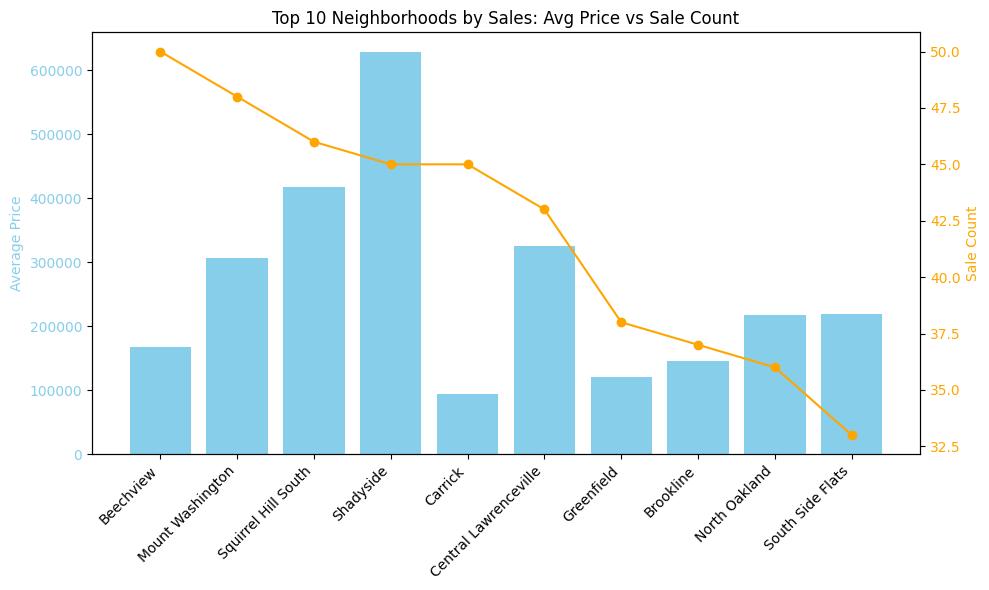

In [ ]:


# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for average price (left y-axis)
ax1.bar(Final_count_avg.index, Final_count_avg['avg_price'], color='skyblue', label='Avg Price')
ax1.set_ylabel('Average Price', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(Final_count_avg.index, rotation=45, ha='right')

# Line for sale count (right y-axis)
ax2 = ax1.twinx()
ax2.plot(Final_count_avg.index, Final_count_avg['sale_count'], color='orange', marker='o', label='Sale Count')
ax2.set_ylabel('Sale Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout
plt.title('Top 10 Neighborhoods by Sales: Avg Price vs Sale Count')
plt.tight_layout()
plt.show()


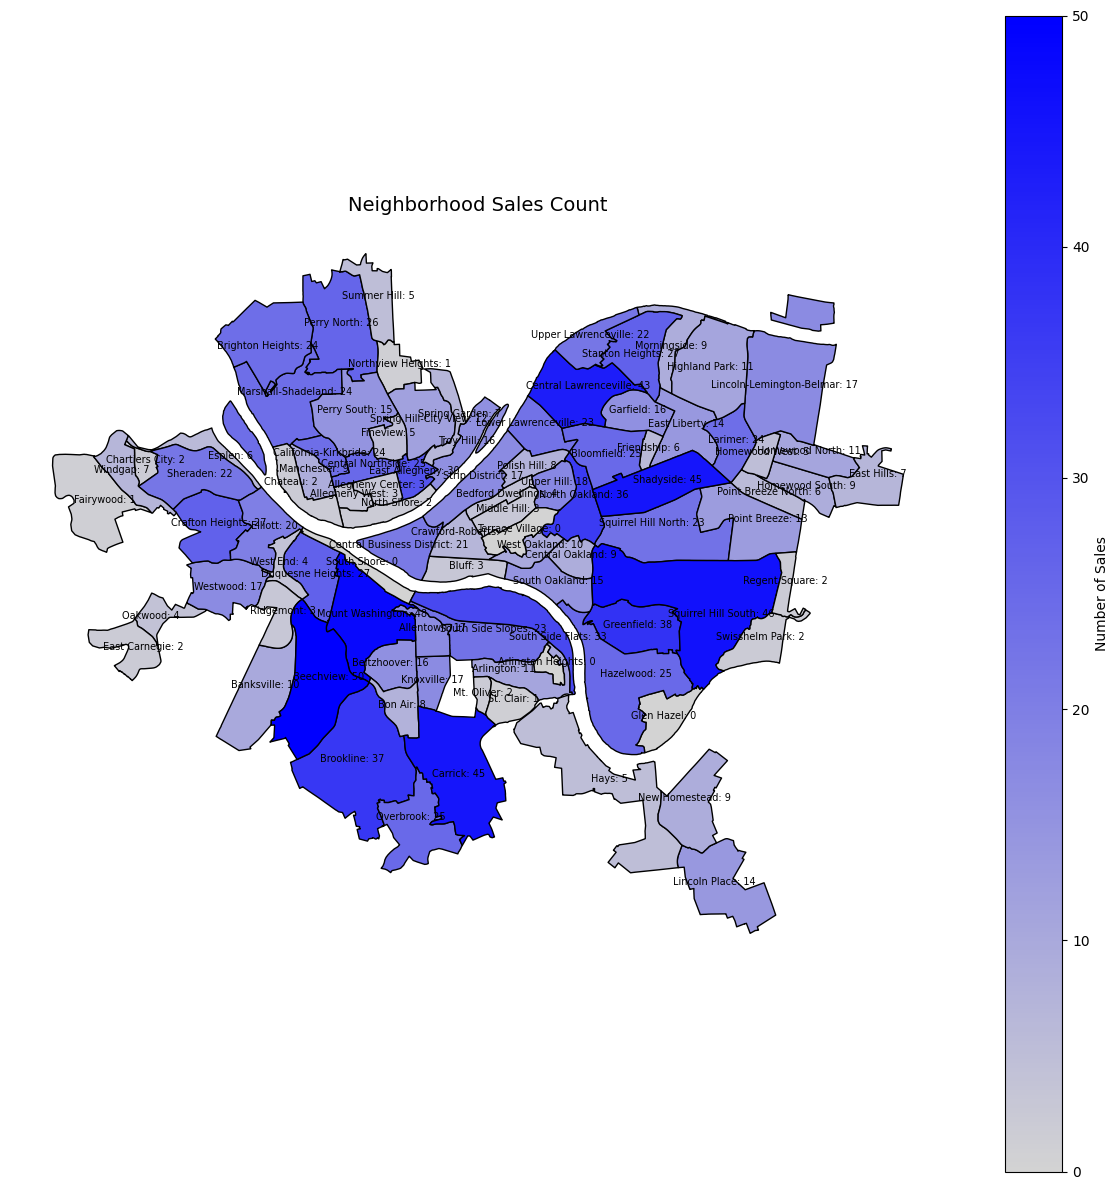

In [44]:
Sales_count_int = grouped
Sales_count_int.name = 'sale_count'


if 'sale_count' in gdf.columns:
    gdf = gdf.drop(columns='sale_count')




gdf = gdf.merge(Sales_count_int, how='left', left_on=name_col, right_index=True)

gdf['sale_count'] = gdf['sale_count'].fillna(0)





#Color


cmap = mcolors.LinearSegmentedColormap.from_list("count_gradient", ["lightgrey", "blue"])
norm = mcolors.Normalize(vmin=gdf['sale_count'].min(), vmax=gdf['sale_count'].max())



fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color=gdf['sale_count'].apply(lambda x: cmap(norm(x))), edgecolor='black')


#Do I want to see the labels of the neighboorhoods?
if show_labels:
    for idx, row in gdf.iterrows():
        point = row.geometry.representative_point()
        label = f"{row['hood'].title()}: {int(row['sale_count'])}"
        ax.text(point.x, point.y, label, fontsize=7, ha='center', color='Black')



#I do need the color bar here
sm=plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
fig.colorbar(sm,ax=ax,label='Number of Sales')
plt.title("Neighborhood Sales Count", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()




# Evan Mains's Project:

In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("Population-Density.csv")

This dataset contains the Population Density for all neighborhoods in Pittsburgh.

In [8]:
pd.set_option("display.max_columns", None)
df.head(90)

,_id,Neighborhood,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,"% Pop. Change, 60-70","% Pop. Change, 70-80","% Pop. Change, 80-90","% Pop. Change, 90-00","% Pop. Change, 00-10",Pop. as % of City total (2010),Land Area (sq. mi),Land Area (acres),Persons / sq. mi (2010),Persons / sq. mi (2000),Persons / acre (2010),Persons / acre (2000),% African American (2010),% Asian (2010),% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
0,1,Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,-0.748408,1.509494,-0.204288,-0.297940,0.053047,0.003052,0.210,134.40,4442.857143,4219.047619,6.941964,6.592262,0.485531,0.060021,0.006431,0.408360,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
1,2,Allegheny West,3,3210,3313,2170,1124,820,654,508,462,-0.482028,-0.270463,-0.202439,-0.223242,-0.090551,0.001511,0.141,90.24,3276.595745,3602.836879,5.119681,5.629433,0.181818,0.015152,0.006494,0.766234,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
2,3,Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,-0.164433,-0.199403,-0.161230,-0.105556,-0.223602,0.008178,0.295,188.80,8474.576271,10915.254237,13.241525,17.055085,0.351200,0.000400,0.008000,0.594000,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
3,4,Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,-0.108578,-0.419093,-0.036617,-0.095475,-0.065033,0.006114,0.470,300.80,3976.595745,4253.191489,6.213431,6.645612,0.198502,0.001605,0.003745,0.764580,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
4,5,Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,-0.103433,-0.280314,0.021146,-0.841015,0.025210,0.000798,0.132,84.48,1848.484848,1803.030303,2.888258,2.817235,0.840164,0.000000,0.016393,0.094262,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Upper Lawrenceville,13,6848,6164,5221,4482,3710,3328,2899,2669,-0.141544,-0.172245,-0.102965,-0.128906,-0.079338,0.008731,0.405,259.20,6590.123457,7158.024691,10.297068,11.184414,0.281379,0.013863,0.017984,0.657175,0.0296,0.031,0.0643,0.2217,0.2448,0.2957,0.1194,0.0540
86,87,West End,4,1984,1820,1702,920,604,441,466,254,-0.459459,-0.343478,-0.269868,0.056689,-0.454936,0.000831,0.200,128.00,1270.000000,2330.000000,1.984375,3.640625,0.374016,0.007874,0.011811,0.531496,0.0748,0.004,0.0000,0.2586,0.2931,0.0862,0.2672,0.0948
87,88,West Oakland,14,2952,4073,3658,3140,2955,1938,2272,2604,-0.141607,-0.058917,-0.344162,0.172343,0.146127,0.008518,0.215,137.60,12111.627907,10567.441860,18.924419,16.511628,0.385177,0.064900,0.004992,0.527266,0.0177,0.023,0.0193,0.3886,0.2938,0.1701,0.0806,0.0476
88,89,Westwood,4,2448,2630,3956,4603,3611,3282,3093,3066,0.163549,-0.215512,-0.091110,-0.057587,-0.008729,0.010029,0.692,442.88,4430.635838,4469.653179,6.922868,6.983833,0.081539,0.056751,0.006849,0.826810,0.0280,0.014,0.0509,0.1677,0.2152,0.3820,0.1196,0.0646


# **Bar Chart**

This bar chart helps represent the most recent population count in each neighborhood.

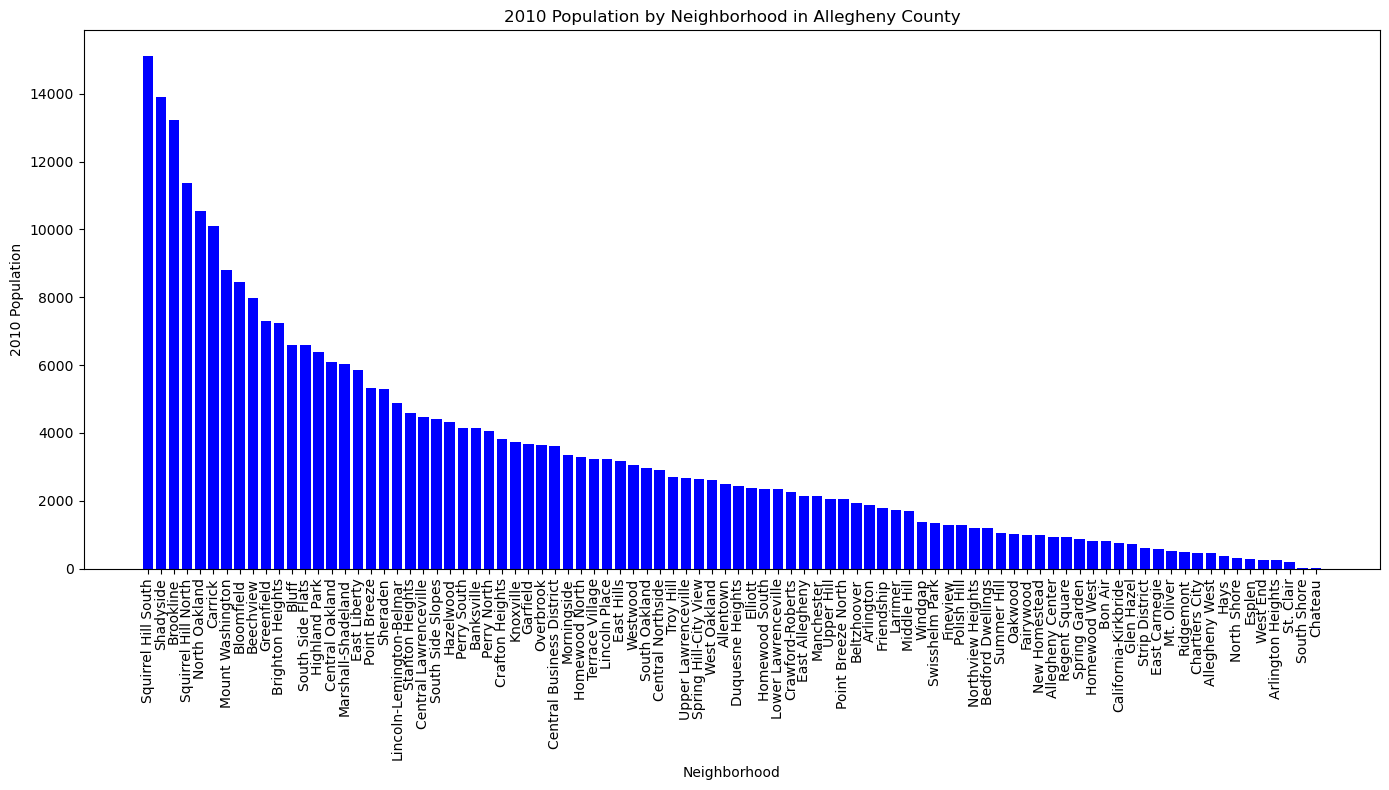

In [9]:
# Clean the data
df.columns = df.columns.str.strip()

# Pull wanted data from dataset
df_2010 = df[['Neighborhood', 'Pop. 2010']].dropna()

# Convert to numeric values
df_2010['Pop. 2010'] = pd.to_numeric(df_2010['Pop. 2010'], errors='coerce')

# Sort the populations
df_sorted = df_2010.sort_values(by='Pop. 2010', ascending=False)

# Create Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['Neighborhood'], df_sorted['Pop. 2010'], color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('2010 Population')
plt.title('2010 Population by Neighborhood in Allegheny County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Bar Chart Pt. 2**

This bar chart helps represent the total area (in acres) of each neighborhood.

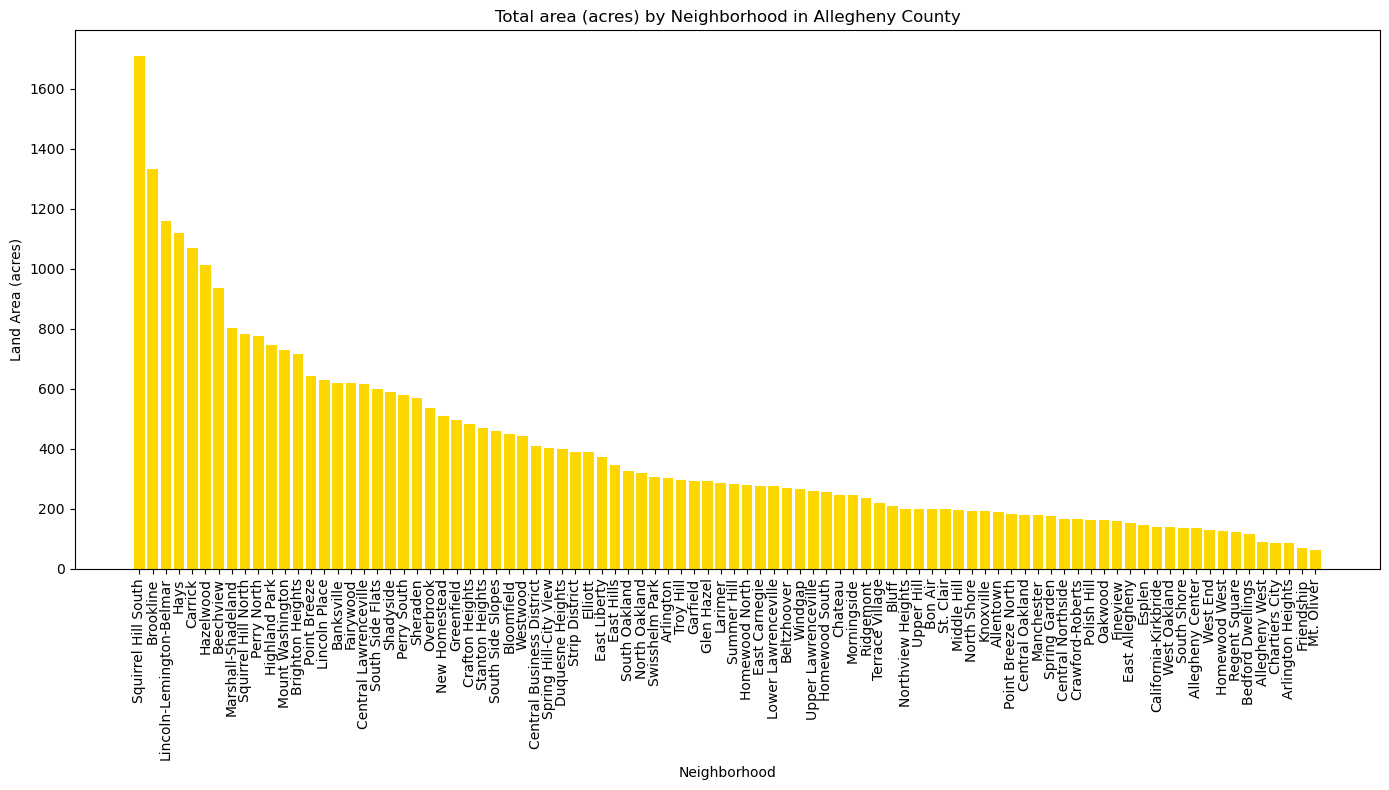

In [10]:
# Clean the data
df.columns = df.columns.str.strip()

# Pull wanted data from dataset
df_2010 = df[['Neighborhood', 'Land Area (acres)']].dropna()

# Convert to numeric values
df_2010['Land Area (acres)'] = pd.to_numeric(df_2010['Land Area (acres)'], errors='coerce')

# Sort the populations
df_sorted = df_2010.sort_values(by='Land Area (acres)', ascending=False)

# Create Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['Neighborhood'], df_sorted['Land Area (acres)'], color='gold')
plt.xlabel('Neighborhood')
plt.ylabel('Land Area (acres)')
plt.title('Total area (acres) by Neighborhood in Allegheny County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Combined Density Chart**

This density chart helps combine data to visualize how dense each neighborhood in Pittsburgh is.

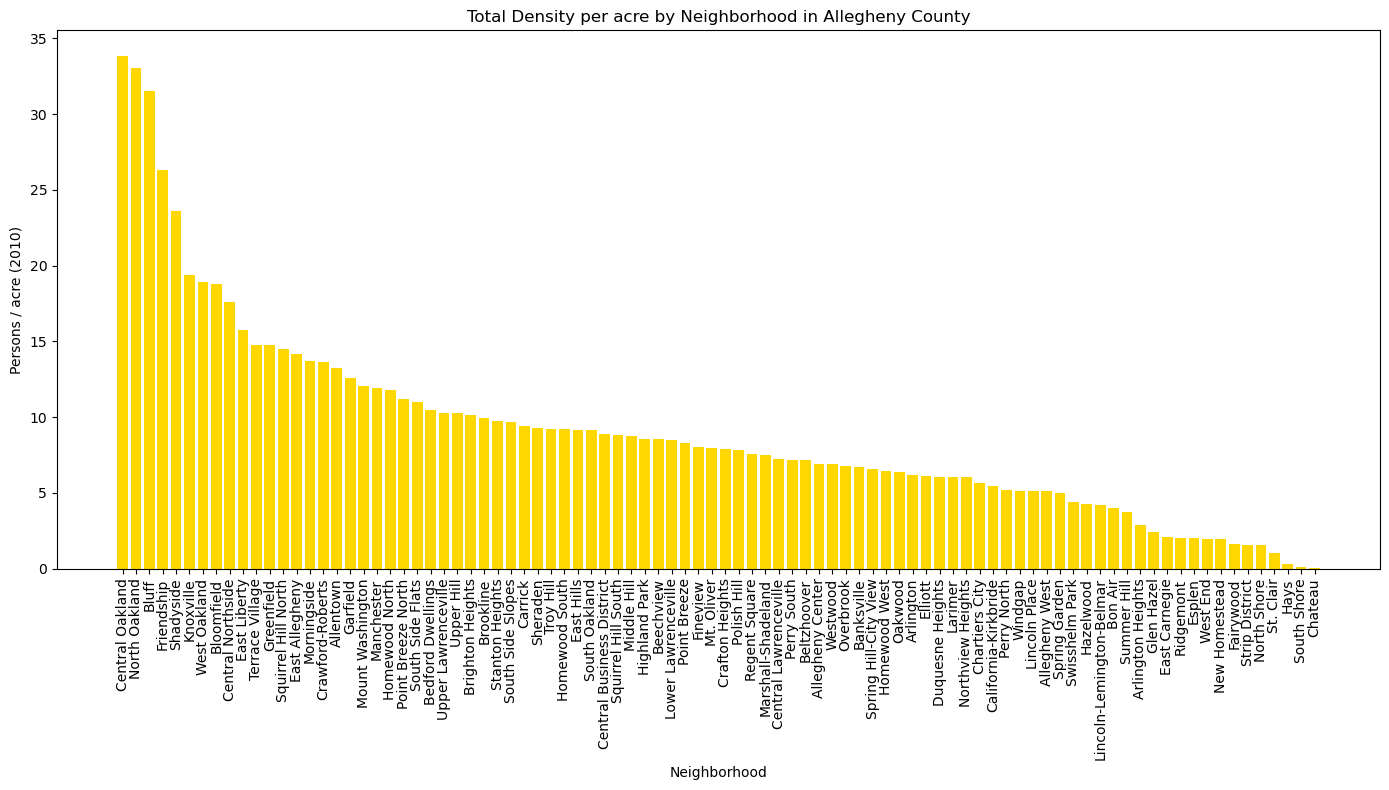

In [11]:
# Clean the data
df.columns = df.columns.str.strip()

# Pull wanted data from dataset
df_2010 = df[['Neighborhood', 'Persons / acre (2010)']].dropna()

# Convert to numeric values
df_2010['Persons / acre (2010)'] = pd.to_numeric(df_2010['Persons / acre (2010)'], errors='coerce')

# Sort the populations
df_sorted = df_2010.sort_values(by='Persons / acre (2010)', ascending=False)

# Create Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['Neighborhood'], df_sorted['Persons / acre (2010)'], color='gold')
plt.xlabel('Neighborhood')
plt.ylabel('Persons / acre (2010)')
plt.title('Total Density per acre by Neighborhood in Allegheny County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **The Best Neighborhood**

Denstiy wise Central Oakland is the best neighborhood, but were not looking for most dense were looking for wealthiest. That title belongs to Squrriel Hill North for being the least dense and having most wealthy house prices.

# Group Conclusion: 

Jason Gao: 

Evan Mains: In conclusion, the wealthiest neighborhood is Squrriel Hill. Although Squrriel Hill is the wealthiest, it's not my favorite neighborhood in Pittsburgh. My favorite neighborhood in Pittsburgh is North Shore. It ranks near the bottom in population density but that's because North Shore is mainly a tourist area. It houses both PNC Park and Heinz Field along with a handful of other venues. I've spent almost 10 years going to Steeler games and other events with friends and family and North Shore never disappoints. It's a great place to hangout and walk around and experience Downtown Pittsburgh without actually being in Downtown. Whether you're going to a concert, game, or other events North Shore is the place to go.